
#Modelo 2: Red Neuronal

##Librerias

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

##Datos

In [ ]:
#Lectura de datos limpios
df = pd.read_csv("/content/drive/MyDrive/Proyecto-Tesis/Data/data-limmpia-100000.csv")

In [ ]:
df.head()

,aa,abil,abl,absolut,accept,access,accessori,accur,across,actual,...,write,wrong,xp,ye,year,yet,zip,zipper,zoom,rating
0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,0,0,0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,5.0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3.0


In [ ]:
# sparamos los rating con 0 menores iguales a 3 y con 1 mayores a 3
df['rating'].value_counts()

5.0    66824
4.0    17461
3.0     6888
1.0     5301
2.0     3505
Name: rating, dtype: int64

In [ ]:
df.loc[df['rating'] < 3, 'rating'] = 0
df.loc[df['rating'] == 3, 'rating'] = 1
df.loc[df['rating'] > 3, 'rating'] = 2

In [ ]:
df['rating'] = df['rating'].astype('int64')

In [ ]:
df.shape

(99979, 1001)

#Red Neuronal

In [ ]:
# Separamos la data en train y test
X, y = df.drop("rating", axis=1), df[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1, stratify=y)

In [ ]:
#Damos formato a los datos
a_X_train = np.array(X_train) 
a_X_test = np.array(X_test) 
a_y_train = np.array(y_train) 
a_y_test = np.array(y_test) 

In [ ]:
#definicion del modelo de clasificacion
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               512512    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
#Entrenamiento del modelo
hist = model.fit(a_X_train, a_y_train, validation_data=(a_X_test, a_y_test), epochs=20)

Epoch 1/20
2500/2500 [==============================] - 20s 5ms/step - loss: 0.4346 - accuracy: 0.8569 - val_loss: 0.3934 - val_accuracy: 0.8708
Epoch 2/20
2500/2500 [==============================] - 12s 5ms/step - loss: 0.3543 - accuracy: 0.8776 - val_loss: 0.3682 - val_accuracy: 0.8749
Epoch 3/20
2500/2500 [==============================] - 12s 5ms/step - loss: 0.2946 - accuracy: 0.8931 - val_loss: 0.3919 - val_accuracy: 0.8758
Epoch 4/20
2500/2500 [==============================] - 12s 5ms/step - loss: 0.2346 - accuracy: 0.9100 - val_loss: 0.4447 - val_accuracy: 0.8696
Epoch 5/20
2500/2500 [==============================] - 13s 5ms/step - loss: 0.1945 - accuracy: 0.9299 - val_loss: 0.5186 - val_accuracy: 0.8663
Epoch 6/20
2500/2500 [==============================] - 12s 5ms/step - loss: 0.1695 - accuracy: 0.9401 - val_loss: 0.5650 - val_accuracy: 0.8663
Epoch 7/20
2500/2500 [==============================] - 12s 5ms/step - loss: 0.1488 - accuracy: 0.9510 - val_loss: 0.6222 - val_ac

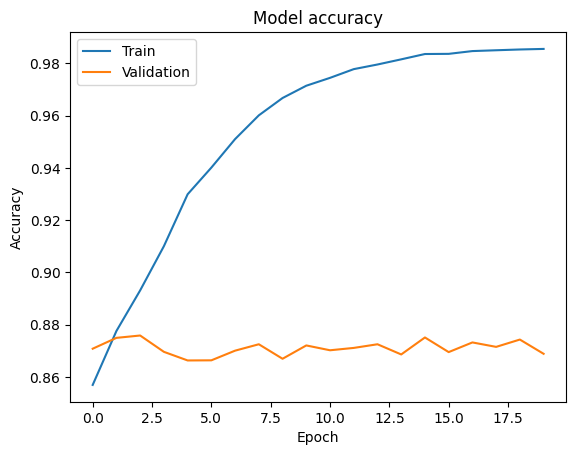

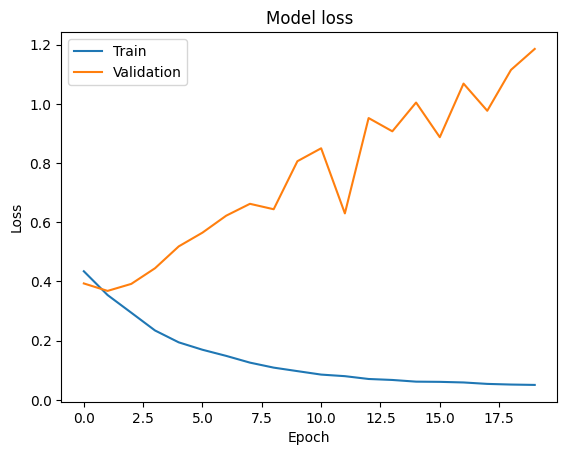

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
